In [1]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [0]:
X_train, X_test = mnist.data[:60000], mnist.data[60000:]
y_train, y_test = mnist.target[:60000], mnist.target[60000:]

_float type의 ndarray reshape가 안되는 현상, astype('int')로 자료형 바꾸어 준 뒤 학습을 위해 reshape_

In [4]:
X_train.astype('int')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
X_train = X_train.astype('int').reshape(-1,28,28,1)
X_test = X_test.astype('int').reshape(-1,28,28,1)

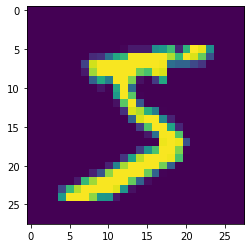

In [6]:
temp = X_train[0].squeeze()

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax1 = plt.subplots(1, 1, figsize = (8,4))

ax1.imshow(temp, interpolation = 'none')

_합성곱 신경망(Conv2D) -> Flatten -> FCNN(128) -> FCNN(10)으로 신경망 학습_

In [0]:
X_train, X_test = X_train/255.0, X_test/255.0

In [8]:
input1 = Input(shape=(28,28,1))
input2 = Input(shape=(28,28,1))
input2c = Conv2D(32, kernel_size=(3, 3), activation='relu')(input2)
joint = tf.keras.layers.concatenate([Flatten()(input1), Flatten()(input2c)])
out = Dense(10, activation='softmax')(Dropout(0.2)(Dense(128, activation='relu')(joint)))
model = tf.keras.models.Model(inputs = [input1, input2], outputs=out)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.fit([X_train, X_train], y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.1681 - acc: 0.9498
Epoch 2/3
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0645 - acc: 0.9797
Epoch 3/3
60000/60000 [==============================] - 76s 1ms/sample - loss: 0.0448 - acc: 0.9859


__개발한 모델 평가__ -> test accuracy 98%

In [19]:
model

In [10]:
from sklearn.metrics import accuracy_score
test_predict_class = model.predict([X_test, X_test]).argmax(axis = -1)
accuracy_score(y_test.astype('int64'), test_predict_class)

0.9847

Shap module import

In [11]:
!pip install shap

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394121 sha256=1f737c4eb44e1113c3990660f18e5f6b5f20531b15194088dbab577830299386
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


사용방법은 Lime에서와 비슷함. explainer를 생성

In [26]:
len([X_test[:3], X_test[:3]])

2

In [12]:
import shap

explainer = shap.GradientExplainer(model, [X_train, X_train])
shap_values = explainer.shap_values([X_test[:3], X_test[:3]])

Using TensorFlow backend.


In [13]:
print(len(shap_values))

10


In [14]:
print(len(shap_values[0]))

2


_feedforward input에 대한 shapely value 시각화_

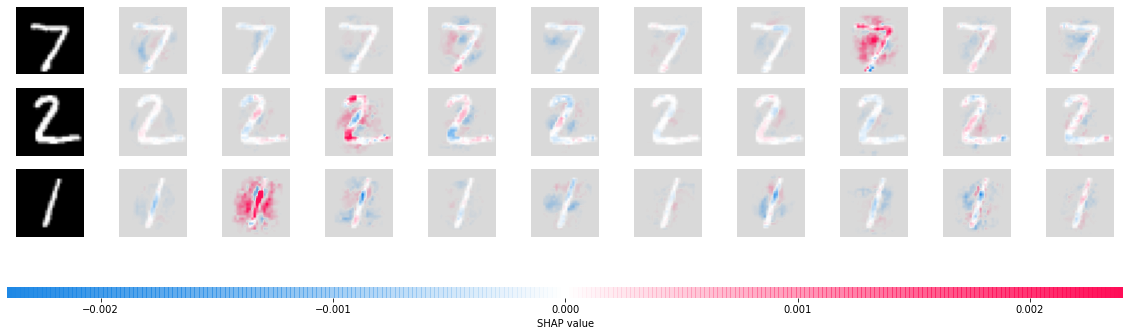

In [15]:
shap.image_plot([shap_values[i][0] for i in range(10)], X_test[:3])

_Conv-net int에 대한 shapely value 시각화_

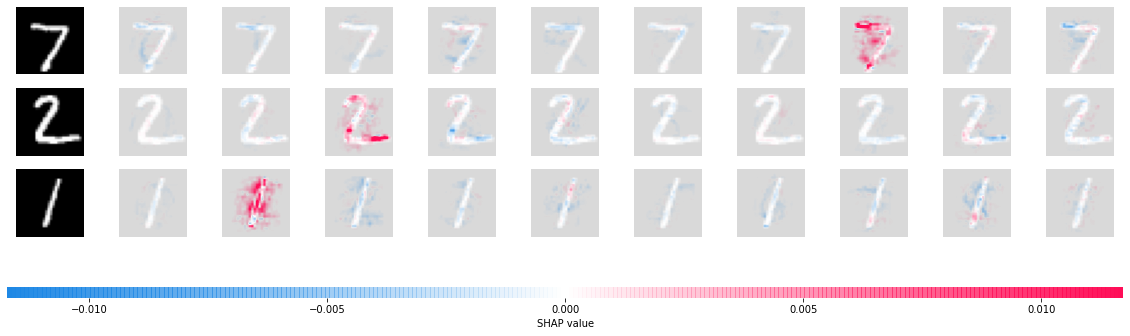

In [16]:
shap.image_plot([shap_values[i][1] for i in range(10)], X_test[:3])

In [0]:
shap_values, shap_values_var = explainer.shap_values([X_test[:3], X_test[:3]], return_variances=True)

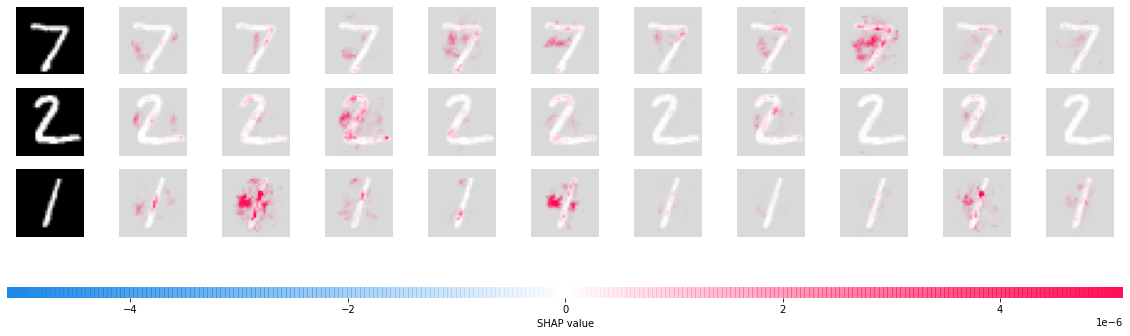

In [18]:
shap.image_plot([shap_values_var[i][0] for i in range(10)], X_test[:3])